In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

     PassengerId  Survived  Pclass                             Name     Sex  \
97            98         1       1  Greenfield, Mr. William Bertram    male   
63            64         0       3            Skoog, Master. Harald    male   
651          652         1       2              Doling, Miss. Elsie  female   

      Age  SibSp  Parch    Ticket     Fare    Cabin Embarked  
97   23.0      0      1  PC 17759  63.3583  D10 D12        C  
63    4.0      3      2    347088  27.9000      NaN        S  
651  18.0      0      1    231919  23.0000      NaN        S  


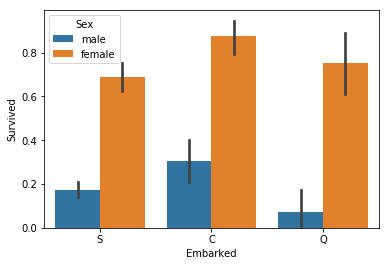

In [28]:
print(train_df.sample(3))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df)

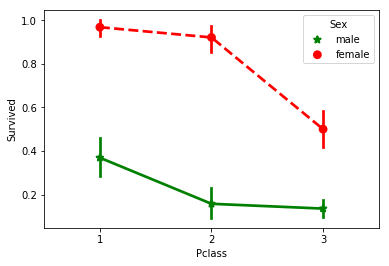

In [29]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
              palette={"male": "green", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [51]:
def simplify_ages(df):
    #Replace all NaN values with -0.5
    df.Age = df.Age.fillna(-0.5)
    
    #Create bins (intervals) for the age groups
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    
    #Assign a group to every age
    df.Age = pd.cut(df.Age, bins, labels=group_names)
    
    return df

def simplify_cabins(df):
    #Replace all NaN values with the letter N
    df.Cabin = df.Cabin.fillna("N")
    
    #Get only the letter of the cabin
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    
    return df

def simplify_fares(df):
    #Replace all NaN values with -0.5
    df.Fare = df.Fare.fillna(-0.5)
    
    #Create bins (intervals) for the fare groups
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    
    #Assign a group to every fare
    df.Fare = pd.cut(df.Fare, bins, labels=group_names)
    
    return df

def format_name(df):
    #New feature: passenger's last name
    df['LastName'] = df.Name.apply(lambda x: x.split(" ")[0])
    
    #New feature: passenger's name prefix
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(" ")[1])
    
    return df

def drop_features(df):
    #Drop useless features
    return df.drop(['Ticket', 'Embarked', 'Name'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,N,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,N,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.
5,6,0,3,male,Unknown,0,0,2_quartile,N,"Moran,",Mr.
6,7,0,1,male,Adult,0,0,4_quartile,N,"McCarthy,",Mr.
7,8,0,3,male,Baby,3,1,3_quartile,N,"Palsson,",Master.
8,9,1,3,female,Young Adult,0,2,2_quartile,N,"Johnson,",Mrs.
9,10,1,2,female,Teenager,1,0,3_quartile,N,"Nasser,",Mrs.
